** Exercise 2: Numerical simulations of planetary orbits. Due: September 20th **
<!--- %%latex -->

Kepler's 1st and 3rd laws are also possible to prove analytically, but those proofs are a bit tedious and involve mostly single-variable analysis. Instead, we'll now switch to numerical simulations. We'll write a small python program that simulates a planet orbiting around the Sun by numerically integrating Newton's 2nd law for this system. First we need to write this on the form of a set of coupled 1st order diffential equations.

** Exercise 2.1 **
>Let $\vec{r}(t)=(x(t),y(t))$, $\dot{\vec{r}}(t)=(v_x(t),v_y(t))$ and put the Sun in origo. Clearly $\dot{x} = v_x$ and $\dot{y} = v_y$. Show that Newton's 2nd law then implies,

>$$ 
\dot{v}_x = -k \frac{x}{(x^2+y^2)^{3/2}}, \\
\dot{v}_y = -k \frac{y}{(x^2+y^2)^{3/2}}. $$

** Answer: **
We know that from exercise 1.1 that $$\vec{F}=-k\frac{m}{|\vec{r}|^2} \frac{\hat{r}}{|\vec{r}|}.$$
Newton's 2nd law: $$\vec{F}=m\ddot{\vec{r}}.$$
This gives:
$$\ddot{\vec{r}}=-k\frac{1}{|\vec{r}|^2} \frac{\hat{r}}{|\vec{r}|}.$$
It follows that,
$$\dot{v}_x = -k \frac{x}{(x^2+y^2)^{3/2}}, \\
\dot{v}_y = -k \frac{y}{(x^2+y^2)^{3/2}}.$$


** Exercise 2.2 **

Let us now discretize time as follows,

$$ t_i = i \, \Delta t $$

where $i \in \mathcal{Z}^+$ and $\Delta t$ is a small time-step, and use the shorthand notation $x^i = x(t_i)$ and similarly for the other variables. Given the initial values $x^0$, $y^0$, $v_x^0$ and $v_y^0$, we can recursively get the position and velocity of the planet at a later time $t^i$ by

$$
v_x^i = v_x^{i-1} + \dot{v}_x^{i-1} \, \Delta t \\
v_y^i = v_y^{i-1} + \dot{v}_y^{i-1} \, \Delta t \\
x^i = x^{i-1} + \dot{x}^{i} \, \Delta t   \\
y^i = y^{i-1} + \dot{y}^{i} \, \Delta t   
$$

Note that the numerical scheme provided above allows the velocities to be updated with the positions at the previous step while the positions are updated with the velocities at the current step. This is known as the *Euler-Cramer* method and ensures energy conservation over the course of one revolution.


> Your task is to implement the scheme above and write a class Planet that is initiated with a constructor that takes as arguments the initial values of $x$, $y$, $v_x$ and $v_y$, and sets the initial time $self.t$ to zero. Yoou will then need to write a function called doTimeStep which takes step $\mathrm{d} t$ as an argument and updates the position and velocity of the planet using the above described Euler-Cramer method. We provide the short code outline below if you wish to use it.

In [11]:
import matplotlib.pyplot as plt
import math 
import numpy as np

class Planet:
	
	k = 4*math.pi**2
	
	def __init__(self,x,y,vx,vy):
		self.x = x
		self.y = y
		self.vx = vx
		self.vy = vy
		self.t = 0
	
	def doTimeStep(self,dt):
		self.vx = self.vx + -self.k * self.x / ((self.x **2 + self.y **2)**1.5) * dt #new vx using formula from 2.1
		self.vy = self.vy + -self.k * self.y / ((self.x **2 + self.y **2)**1.5) * dt #new vy
		self.x += self.vx * dt #calculates the new coordinates
		self.y += self.vy * dt
		self.t += dt #total time elapsed
	
	def orbitPlot(self,stepSize,time): #method to simplily ploting
		self.xlist = [self.x]
		self.ylist = [self.y]
		
		while self.t <= time: #time is the total time to simulate
			self.doTimeStep(stepSize) #stepSize is the doTimeStep dt
			self.xlist.append(self.x)
			self.ylist.append(self.y)
		
		#ploting and formatin
		plt.plot(self.xlist,self.ylist)
		plt.plot(0,0,'r*')
		plt.axis('equal')
		plt.legend()
		self.getPeriodAndAxis(stepSize) #Calculates and prints SMA and period for every orbit.
		
	def getPeriodAndAxis(self,dt):
		SMA = (abs(min(self.xlist)) + abs(max(self.xlist)))/2  #Semi Major Axis
		stepnr = 0  #stepcounter starting value
		
		for n in self.ylist:
			stepnr += 1  # stepcounter
			if n < 0:
				break     # When the planet has reached the opposite side of the star, wrt starting positions, break the loop
				
		print('Period is ')
		print(2*stepnr*dt)  #double stepnumber times stepsize is the period
		print('SMA is ')
		print(SMA)
		print('T^2/a^3=')
		print((2*stepnr*dt)**2/SMA**3)   #Numerical aroximation of Keplers third Law
        

** Exercise 2.3 **
> Plot the orbit for a few different initial conditions (e.g. same starting positions, but different initial velocity). Are the orbits always elliptical? Try different step sizes! (The smaller step size, the more accurate is the simulation but it also becomes more time consuming)

** Answer: **
See the cell below exercise 2.4 to see orbits with different stepsizes. The orbits are always elliptical. 

Different orbits starting at the same point but with different initial velocity (in the y direction)
Period is 
136504
SMA is 
2651.094356449303
T^2/a^3=
1.0000349997316809
Period is 
241988
SMA is 
3883.2374895465077
T^2/a^3=
1.0000133667012723
Period is 
562808
SMA is 
6816.770088836094
T^2/a^3=
0.9999645042224174
Period is 
1105980
SMA is 
10694.796045768242
T^2/a^3=
0.9999471029948199


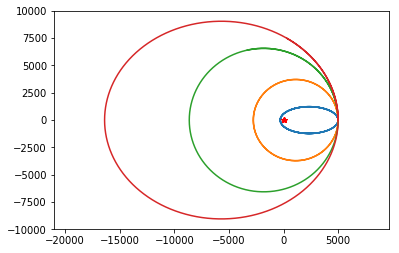

In [12]:
print("Different orbits starting at the same point but with different initial velocity (in the y direction)")
ex1 = Planet(5000,0,0,0.03)
ex1.orbitPlot(2,500000)

ex2 = Planet(5000,0,0,0.075)
ex2.orbitPlot(2,500000)

ex3 = Planet(5000,0,0,0.1)
ex3.orbitPlot(2,700000)

ex4 = Planet(5000,0,0,0.11)
ex4.orbitPlot(2,1200000)

plt.show()

** Exercise 2.4 **
> Write a function that calculates the semi major axis and orbital period of the planet. For simplicity you can assume that the planet is initiated on the positive x-axis with a velocity directed in the positive y-direction. Compute the orbital period $T$ and length $a$ of the semimajor axis for the bound orbits you found in the previous exercise, and calculate $T^2/a^3$ for each orbit. Does Kepler's 3rd law hold?

**Answer: **
See the code above. Kepler's 3rd law seem to hold and $T^2/a^3$ is close to 1 for all reasonable orbits.

Same orbits but change in dt
dt = 1
Period is 
241986
SMA is 
3883.2374877963584
T^2/a^3=
0.9999968381554322


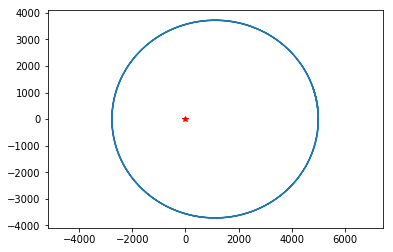

In [13]:
print("Same orbits but change in dt")
print("dt = 1")
ex1 = Planet(5000,0,0,0.075)
ex1.orbitPlot(1,500000)

plt.show()

dt = 100
Period is 
242000
SMA is 
3883.244050429388
T^2/a^3=
1.0001074797860976


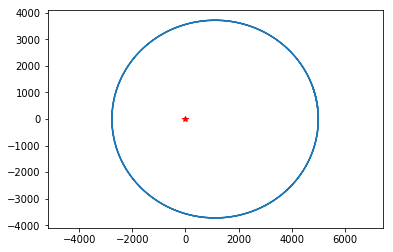

In [14]:
print("dt = 100")
ex2 = Planet(5000,0,0,0.075)
ex2.orbitPlot(100,500000)

plt.show()

dt = 10000
Period is 
260000
SMA is 
4114.582924093078
T^2/a^3=
0.9704412258782936


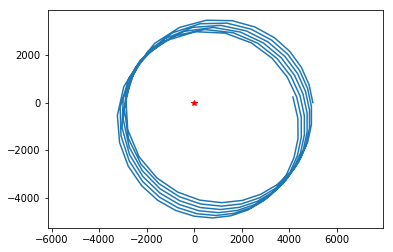

In [15]:
print("dt = 10000")
ex3 = Planet(5000,0,0,0.075)
ex3.orbitPlot(10000,1500000)

plt.show()

dt = 50000
Period is 
400000
SMA is 
8518.87435235384
T^2/a^3=
0.2588054064028832


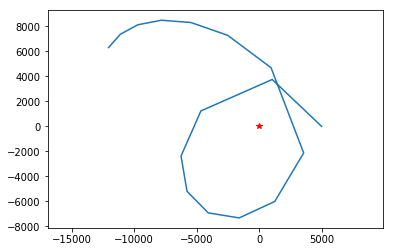

In [16]:
print("dt = 50000")
ex4 = Planet(5000,0,0,0.075)
ex4.orbitPlot(50000,700000)

plt.show()